#Import necessary libraries

In [126]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score


# Data analysis

In [127]:
#Source of "data.csv"
#https://www.kaggle.com/code/devraai/predicting-calorie-burn-from-exercise-metrics/input

df = pd.read_csv("data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [128]:
#Check for "null" (NaN) values
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


In [129]:
df[df["Calories"].isnull()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


# Data cleaning

In [130]:
#Remove lines with NaN values
df.dropna(inplace=True)

In [131]:
#Confirming the changes
df.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,0


In [133]:
#Getting more details about the data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.00000,164.000000
mean,64.146341,107.676829,134.27439,375.790244
std,42.888820,14.637516,16.58306,266.379919
min,15.000000,80.000000,100.00000,50.300000
25%,45.000000,100.000000,124.00000,250.925000
50%,60.000000,105.500000,131.00000,318.600000
75%,60.000000,111.000000,143.00000,387.600000
max,300.000000,159.000000,184.00000,1860.400000


# Data visualization

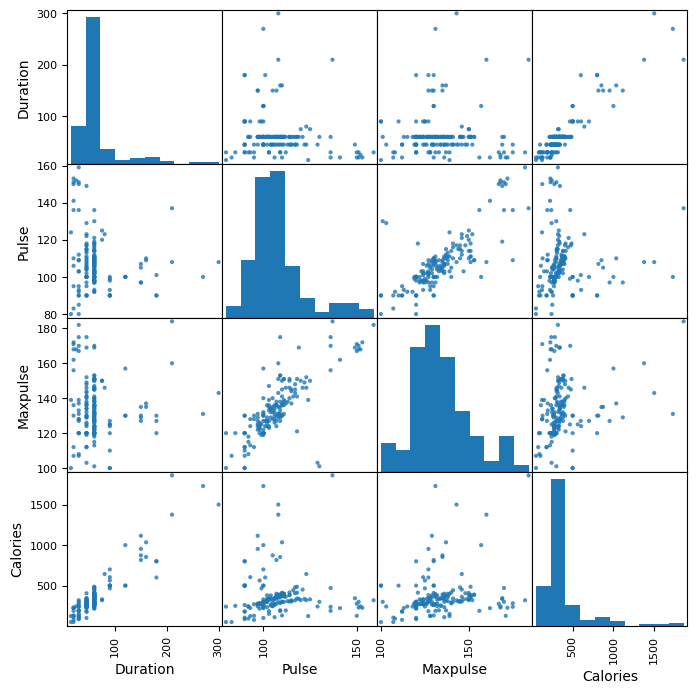

In [134]:
_ = pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(8,8))

# Preliminary tests

Checking the correlation (linear regression) between 'Duration' and 'Calories' columns

<Axes: xlabel='Duration', ylabel='Calories'>

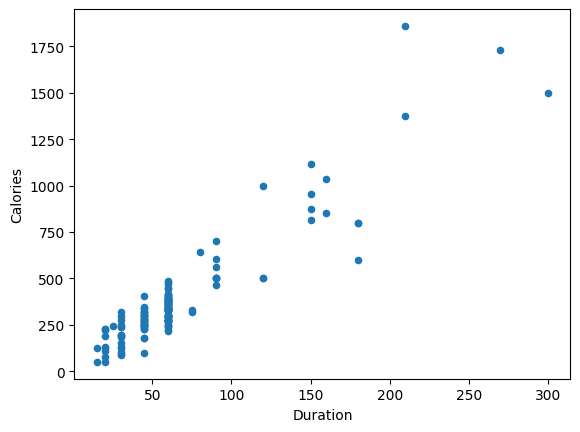

In [135]:
df.plot.scatter(x='Duration', y='Calories')

In [136]:
#Choosing attributes
X = df[['Duration']]
y = df['Calories']

In [137]:
#Separating the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
#Preparing the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = model.predict(X_test)

In [141]:
#Calculation the mean squared error (mse) and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(8245.553232781873, 0.7471444773251994)

The correlation between 'Duration' an 'Calories' attributes is ~0.74.

# Find the best corralation between two attributes

The goal of the next subpart is to find 2 single attributes with the best (highest) R2 value.

In [142]:
def perform_reg(a, b):

  if type(a) == list:
      X = df[a]
  else:
    X = df[[a]]

  y = df[b]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return (a, b, mse, r2)


In [143]:
def max_func(my_tuple):
  r2_max = 0
  x_max = '0'
  y_max = '0'
  for (x, y, mse, r2) in my_tuple:
    if r2 > r2_max:
      r2_max = r2
      x_max = x
      y_max = y

  return (x_max, y_max, r2_max)

In [144]:
my_list1 = ['Duration','Pulse','Maxpulse', 'Calories']
my_list2 = ['Duration','Pulse','Maxpulse', 'Calories']

results = []
processed_pairs = set()

for x in my_list1:
  for y in my_list2:
    if ( (x == y) or  ((x,y) in processed_pairs) or((y,x) in processed_pairs)):
      continue
    results.append(perform_reg(x, y))
    processed_pairs.add((x, y))  # Store the pair in a set, to avoid repetition like (x, y) and (y, x)
    processed_pairs.add((y, x))

print("All pairs: ", results)
print("Result:")
max_func(results)

All pairs:  [('Duration', 'Pulse', 302.1379258983467, 0.03665040344990256), ('Duration', 'Maxpulse', 345.71617880233185, -0.01063807967244701), ('Duration', 'Calories', 8245.553232781873, 0.7471444773251994), ('Pulse', 'Maxpulse', 59.64273889429252, 0.825645350728589), ('Pulse', 'Calories', 36634.99103855142, -0.12343702668866219), ('Maxpulse', 'Calories', 35596.72487262318, -0.09159788543885483)]
Result:


('Pulse', 'Maxpulse', 0.825645350728589)

The best correlating (highest R2 value) attribute pair is ('Pulse', 'Maxpulse').

# Find the best correlation between the 'Calories' and any other set of other attributes

In [145]:
#Helper function
import itertools

def gen_combs(x_attributes):
  result = []
  for number in range(1,len(x_attributes)+1):
    result.extend([list(subset) for subset in itertools.combinations(x_attributes, number)])

  return result

In [146]:
#Generating the combinations without 'Calories'
x_attributes = ['Duration','Pulse','Maxpulse']

x_inputs = gen_combs(x_attributes)
print(x_inputs)

[['Duration'], ['Pulse'], ['Maxpulse'], ['Duration', 'Pulse'], ['Duration', 'Maxpulse'], ['Pulse', 'Maxpulse'], ['Duration', 'Pulse', 'Maxpulse']]


In [147]:
res = []

for elem in x_inputs:
  res.append(perform_reg(elem, 'Calories'))

print("All x-y pairs: ", res)
print("Result:")
max_func(res)

All x-y pairs:  [(['Duration'], 'Calories', 8245.553232781873, 0.7471444773251994), (['Pulse'], 'Calories', 36634.99103855142, -0.12343702668866219), (['Maxpulse'], 'Calories', 35596.72487262318, -0.09159788543885483), (['Duration', 'Pulse'], 'Calories', 5779.421887312642, 0.8227700797243427), (['Duration', 'Maxpulse'], 'Calories', 3558.0341051846717, 0.8908904535617548), (['Pulse', 'Maxpulse'], 'Calories', 28123.525141594386, 0.13757288948620627), (['Duration', 'Pulse', 'Maxpulse'], 'Calories', 4354.413282161514, 0.8664689420685995)]
Result:


(['Duration', 'Maxpulse'], 'Calories', 0.8908904535617548)

The 'Calories' attribute correlates the best with the ('Duration', 'Maxpulse') attributes.